<a href="https://colab.research.google.com/github/avii-001/Data-Science/blob/main/Heart_disease_Data_Analysis_Plotly_sns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots       # 3d interactive visualization

In [ ]:
# Column Descriptions:
# id (Unique id for each patient)
# age (Age of the patient in years)
# origin (place of study)
# sex (Male/Female)
# cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
# trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
# chol (serum cholesterol in mg/dl)
# fbs (if fasting blood sugar > 120 mg/dl)
# restecg (resting electrocardiographic results)
# -- Values: [normal, stt abnormality, lv hypertrophy]
# thalach: maximum heart rate achieved
# exang: exercise-induced angina (True/ False)
# oldpeak: ST depression induced by exercise relative to rest
# slope: the slope of the peak exercise ST segment
# ca: number of major vessels (0-3) colored by fluoroscopy
# thal: [normal; fixed defect; reversible defect]
# num: the predicted attribute

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/kusumm/Data Science/data/heart_disease_uci.csv')
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
df.dropna()
# df.fillna()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,68,Male,Cleveland,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
300,301,57,Male,Cleveland,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,3
301,302,57,Female,Cleveland,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1
508,509,47,Male,Hungary,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,flat,0.0,reversable defect,1


In [ ]:
top_leagues=df['cp'].value_counts().nlargest().index
top_leagues

Index(['asymptomatic', 'non-anginal', 'atypical angina', 'typical angina'], dtype='object', name='cp')

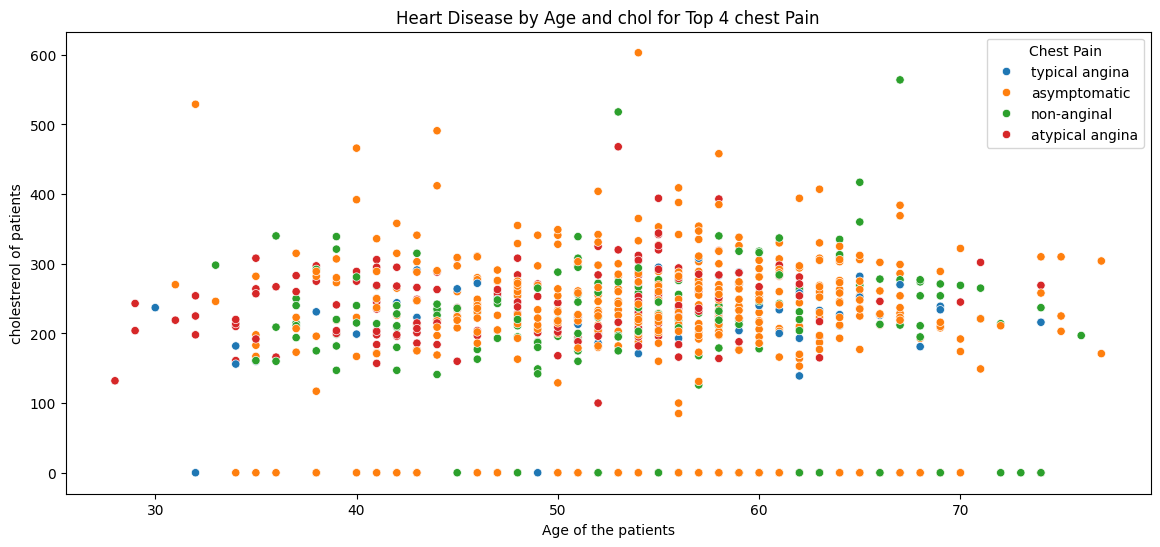

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='age',y='chol',data=df[df['cp'].isin(top_leagues)],hue='cp')
plt.title('Heart Disease by Age and chol for Top 4 chest Pain')
plt.xlabel('Age of the patients')
plt.ylabel('cholestrerol of patients')
plt.legend(title='Chest Pain',loc='upper right')
plt.show()

In [ ]:
fig=px.scatter(df,x='chol', y ='age', color='sex')
fig.update_layout(width=1000, height=600)
fig.update_layout(title_text='Scatter Plot of Cholestrol vs Age (colored by sex)')
fig.show()

In [ ]:
from plotly.offline import iplot

In [ ]:
fig=px.box(df, x=df['chol'],
           labels={"x":'Cholestrerol'},
           title='Bpx plot of cholestrol')
iplot(fig)

In [ ]:
fig=px.scatter(df,x='ca', y ='age', color='cp')
fig.update_layout(width=1000, height=600)
fig.update_layout(title_text='Scatter Plot of Chestpain vs Age (colored by sex)')
fig.show()

In [ ]:
fig=px.box(df, x=df['ca'],
           labels={"x":'Chestpain'},
           title='Bpx plot of Chestpain')
iplot(fig)

In [ ]:
fig=px.bar(df,x='age',y='chol',hover_data='oldpeak', color='sex', height=480)
fig.show()

In [ ]:
fig=px.bar(df,x='age',y='ca',hover_data='num', color='sex', height=480 )
fig.show()

In [ ]:
def generate_rating_df(df):
  rating_df=df.groupby(['cp','slope']).agg({'id':'count'}).reset_index()
  rating_df=rating_df[rating_df['id']!=0]
  rating_df.columns=['cp','slope','counts']
  rating_df=rating_df.sort_values('slope')
  return rating_df

rating_df=generate_rating_df(df)
fig=px.bar(rating_df ,x='cp',y='counts', color='slope')
fig.update_traces(textposition='auto',textfont_size=20)
fig.update_layout(barmode='stack')
fig.show()

In [ ]:
def generate_rating_df(df):
  rating_df=df.groupby(['cp','slope']).agg({'id':'count'}).reset_index()
  rating_df=rating_df[rating_df['id']!=0]
  rating_df.columns=['cp','slope','counts']
  rating_df=rating_df.sort_values('slope')
  return rating_df

rating_df=generate_rating_df(df)
fig=px.bar(rating_df ,x='cp',y='counts', color='slope',barmode='group',text='counts')
fig.update_traces(textposition='auto',textfont_size=20)

fig.show()

In [ ]:
def generate_rating_df(df):
  rating_df=df.groupby(['cp','slope']).agg({'id':'count'}).reset_index()
  rating_df=rating_df[rating_df['id']!=0]
  rating_df.columns=['cp','slope','counts']
  rating_df=rating_df.sort_values('slope')
  # Calculate percentage
  total_counts=rating_df['counts'].sum()
  rating_df['percentage']=rating_df['counts']/total_counts*100

  return rating_df

rating_df=generate_rating_df(df)
fig=px.bar(rating_df ,x='cp',y='counts', color='slope',barmode='group',text='percentage')
fig.update_traces(textposition='outside', textfont_size=16, texttemplate='%{text:.1f}%')
fig.update_layout(barmode='group',yaxis_title='Count',xaxis_title='cf',legend_title="Slope")
fig.update_layout(height=550,width=1000,title_text='Distribution of chest Pain Type by Percentage', title_font_size=24)

fig.show()

In [ ]:
fig = px.scatter(data_frame = df,
                 x = "age",
                 y = 'chol',
                 color = 'cp',
                #  size='slope',
                 hover_data=['oldpeak'],
                 marginal_x = 'histogram',
                 marginal_y = 'box')

fig.update_layout(title_text='<b> Age vs Cholesterol <b>',
                  titlefont={'size':24, 'family': 'Serif'},
                  width=1000,
                  height=550,
                  )
fig.show()

In [ ]:
fig = px.scatter(data_frame = df,
                 x = "cp",
                 y = 'chol',
                 color = 'sex',
                #  size='slope',
                 hover_data=['oldpeak'],
                 marginal_x = 'histogram',
                 marginal_y = 'box')

fig.update_layout(title_text='<b> Chest pain vs Cholesterol <b>',
                  titlefont={'size':24, 'family': 'Serif'},
                  width=1000,
                  height=550,
                  )
fig.show()

In [ ]:
fig = px.scatter(data_frame = df,
                 x = "age",
                 y = 'chol',
                 color = 'sex',
                #  size='slope',
                #  hover_data=['oldpeak'],
                 marginal_x = 'violin',
                 marginal_y = 'box')

fig.update_layout(title_text='<b> Age vs Cholesterol <b>',
                  titlefont={'size':24, 'family': 'Serif'},
                  width=1000,
                  height=550,
                  )
fig.show()
# marginal_x and marginal_y: Valid values are 'rug', 'box', 'violin', 'histogram', or None.

In [ ]:
fig = px.scatter(data_frame = df,
                 x = "age",
                 y = 'chol',
                 color = 'sex',
                 trendline='ols'
)


fig.update_layout(title_text='<b> Age vs Cholesterol <b>',
                  titlefont={'size':24, 'family': 'Serif'},
                  width=1000,
                  height=550,
                  )
fig.show()
# marginal_x and marginal_y: Valid values are 'rug', 'box', 'violin', 'histogram', or None.

In [ ]:
fig=px.histogram(df, x='age', height=500, width=900, template='simple_white', color='sex',
                 color_discrete_sequence=['purple','pink'])

fig.update_layout(title={'text':"Histogram of People by Age", 'font':{'size':25}},
                     title_font_family='Times New Roman',
                     title_font_color='darkgrey')

fig.update_layout(font_family='classic-roman',
                  font_color='grey',
                  yaxis_title={'text':'Count','font':{'size':18}},
                  xaxis_title={'text':'Age','font':{'size':18}},
                  )
fig.show()

In [ ]:
from plotly.offline import iplot

category=df['cp'].value_counts()

fig=px.bar(category,
           x=category.index,
           y=(category/sum(category))*100,
           color=category.index,
           labels={"y":'Frequncy in Percentage', 'cp':'Category'},
           title='Frequency of Chest Pain Category in Percentage',
           text=category.apply(lambda x: f'{(x/sum(category))*100:.1f}%'),
           template='plotly_dark'
           )

fig.update_layout(showlegend=False)
fig.update_traces(textfont={
    "family":"Times New Roman",
    "size": 16
})
fig.show()


In [ ]:
fig=px.pie(values=category,
           names=category.index,
           color_discrete_sequence=['#EFB6C8','#A888B5','#8174A0','#441752'],
          #  template='plotly_dark'
)
fig.update_traces(textposition='outside', textinfo='percent+label', textfont_size=20)
fig.update_layout(title={'text':"Frequency of Chest Pain Category", 'font':{'size':25}})
fig.show()



In [ ]:
#Calculate quartile and IQR
Q25=np.quantile(df['chol'], q=0.25)
Q75=np.quantile(df['chol'], q=0.75)
IQR=Q75-Q25
cut_off=IQR*1.5

# print number of outliers
print("Number of cholestrol Lower Outliers:", df[df['chol']<=(Q25-cut_off)]['chol'].count())
print("Number of cholestrol Upper Outliers:", df[df['chol']<=(Q75-cut_off)]['chol'].count())
px.box(df, y='chol')

Number of cholestrol Lower Outliers: 0
Number of cholestrol Upper Outliers: 0


In [ ]:
grouped_df=df.groupby(['cp','thal']).size().reset_index(name='count')
grouped_df=grouped_df.sort_values(by='count', ascending=False)

fig=px.bar(grouped_df,
           y='cp',
           x='count',
           color='thal',
           title=f"Count of Patients by cp and thal (Total Patients: {grouped_df['count'].sum()})",
           labels={'count':'Number of Patients'},
           text_auto=True,
           color_discrete_sequence=px.colors.qualitative.Set2,
           hover_data={'cp':True,'thal':True,'count':True}
)
fig.update_layout(
    xaxis_title='Number of Patients',
    yaxis_title='Chest Pain Type',
    font=dict(size=14),
    title_font=dict(size=20),
    legend_title='Thal Type',
    plot_bgcolor='rgba(240,240,240,0.5)'
)
fig.show()

In [ ]:
### Reference
grouped_df = df.groupby(['cp', 'thal']).size().reset_index(name='count')
total_count = grouped_df['count'].sum()
grouped_df['percentage'] = (grouped_df['count'] / total_count * 100).round(2)

# Enhanced bar chart
fig = px.bar(
    grouped_df,
    y='cp',
    x='count',
    color='thal',
    title=f"🌟 Count of Patients by cp and thal 🌟<br>(Total Patients: {total_count})",
    labels={'count': 'Number of Patients', 'cp': 'Chest Pain Type', 'thal': 'Thalassemia Type'},
    text_auto='.2s',
    color_discrete_sequence=px.colors.sequential.Viridis,
    hover_data={'cp': True, 'thal': True, 'count': True, 'percentage': True}
)

# Adding max value annotation
max_value = grouped_df['count'].max()
max_row = grouped_df[grouped_df['count'] == max_value]
max_cp = max_row.iloc[0]['cp']
max_thal = max_row.iloc[0]['thal']
fig.add_annotation(
    x=max_value,
    y=max_cp,
    text=f"🔝 Highest Count: {max_value} ({max_thal})",
    showarrow=True,
    arrowhead=2,
    font=dict(size=12, color='darkblue'),
    align='center',
    bgcolor='lightyellow',
    opacity=0.9
)

fig = px.bar(
    grouped_df,
    y='cp',
    x='count',
    color='thal',
    facet_col='thal',
    title=f"✨ Patient Distribution by cp and thal ✨<br>(Total: {total_count})",
    labels={'count': 'Number of Patients', 'cp': 'Chest Pain Type'},
    text_auto='.2s',
    color_discrete_sequence=px.colors.qualitative.T10,
    hover_data={'cp': True, 'thal': True, 'count': True, 'percentage': True}
)

fig.update_layout(
    xaxis_title='Number of Patients',
    yaxis_title='Chest Pain Type',
    font=dict(size=14, color='darkslategray'),
    title_font=dict(size=20, color='darkblue'),
    legend_title='Thalassemia Type',
    plot_bgcolor='rgba(240,240,240,0.8)',
    paper_bgcolor='rgba(255,255,255,1)',
    title_x=0.5,
    margin=dict(t=100, l=50, r=50, b=50)
)

fig.update_traces(marker=dict(line=dict(color='black', width=1)))
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgrey')
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')

fig.show()

In [ ]:
fig=px.sunburst(df,
                 path=['cp','sex'],
                 )
fig.update_layout(title_text='Chest Pain vs Gender',
                  titlefont={'size':24, 'family':'Serif'},
                  width=750,
                  height=750
                  )
fig.show()

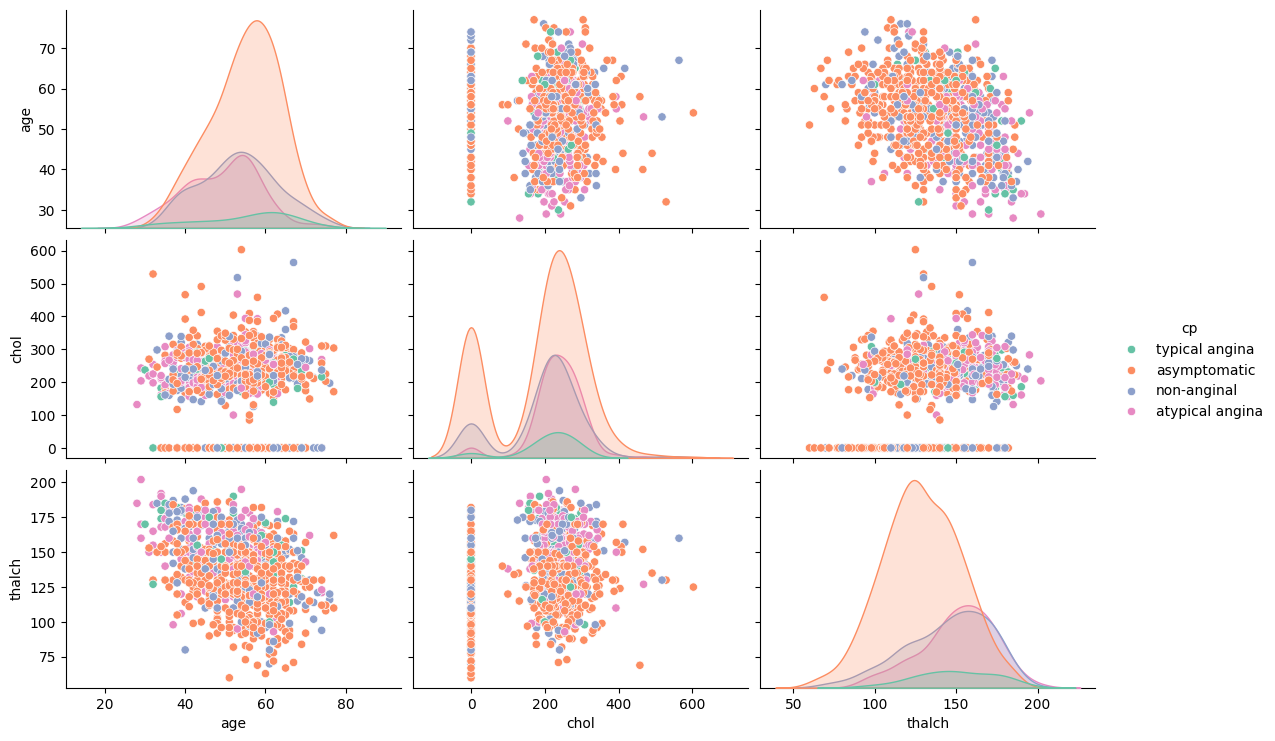

In [ ]:
sns.pairplot(df[['cp','age','chol','thalch']], hue='cp',aspect=1.5, dropna=True, palette='Set2')
plt.show()

/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning:

Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.

/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning:

Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.



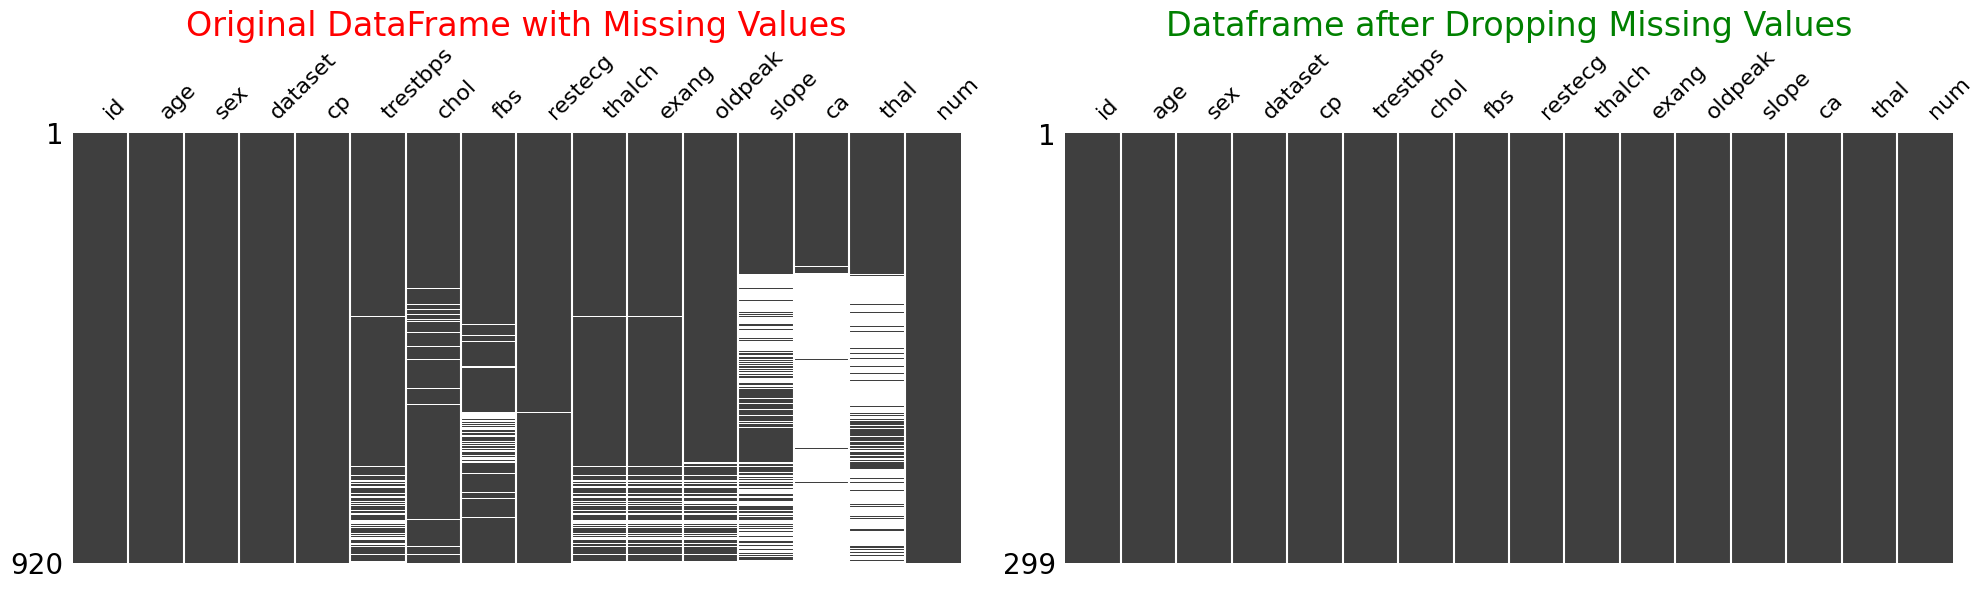

In [ ]:
import missingno as msno
fig,axes= plt.subplots(nrows=1, ncols=2, figsize=(20,6))

msno.matrix(df,ax=axes[0])
axes[0].set_title("Original DataFrame with Missing Values", fontsize=24, color='Red')

drop_df=df.dropna()
msno.matrix(drop_df,ax=axes[1])
axes[1].set_title("Dataframe after Dropping Missing Values", fontsize=24, color='Green')

plt.tight_layout()
plt.show()